# ETS & MA

In [35]:
import numpy as np
import pandas as pd
%matplotlib inline

In [36]:
airline = pd.read_csv("../Data/airline_passengers.csv", index_col="Month", parse_dates=True)

In [37]:
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## ETS

## Error/Trend/Seasonality Models

In [38]:
airline.isna().sum()

Thousands of Passengers    0
dtype: int64

In [39]:
airline.isnull().sum()

Thousands of Passengers    0
dtype: int64

In [40]:
airline.dropna(inplace=True)

<AxesSubplot:xlabel='Month'>

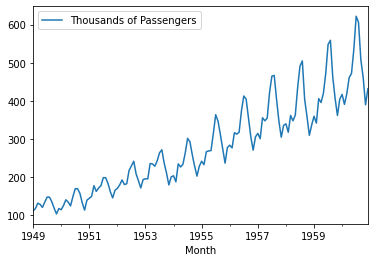

In [41]:
airline.plot()

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

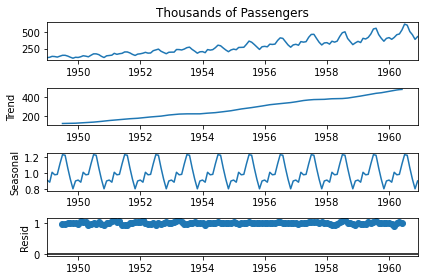

In [43]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')  # model='mul' also works
result.plot();

In [44]:
result.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

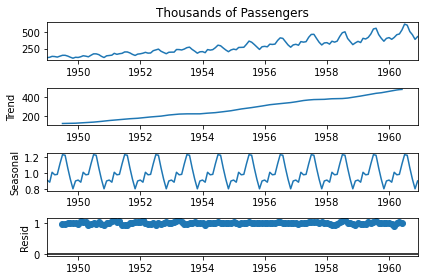

In [45]:
result.plot();

## Moving Averages

### Simple Moving Average

In [47]:
airline["6-Month-SMA"] = airline["Thousands of Passengers"].rolling(window=6).mean()
airline["12-Month-SMA"] = airline["Thousands of Passengers"].rolling(window=12).mean()

In [48]:
airline

,Thousands of Passengers,6-Month-SMA,12-Month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
...,...,...,...
1960-08-01,606,519.166667,463.333333
1960-09-01,508,534.000000,467.083333
1960-10-01,461,534.000000,471.583333


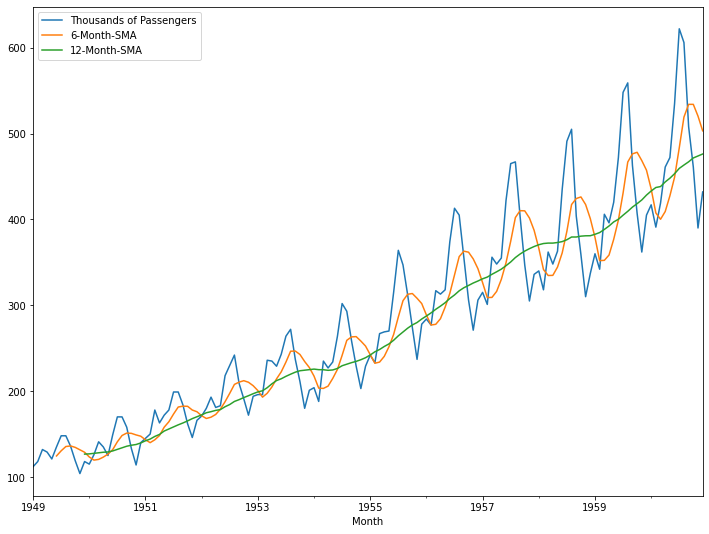

In [50]:
airline.plot(figsize=(12,9)).autoscale(axis="x", tight=True)

### Exponentially Weighted Moving Average 

In [55]:
airline["EWMA12"] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

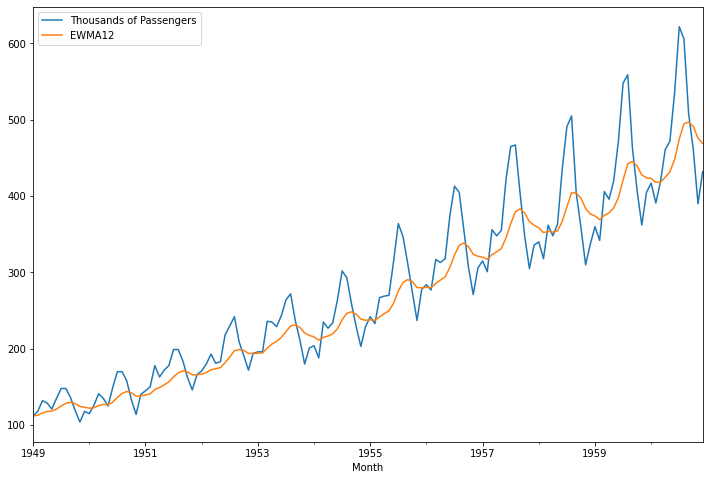

In [56]:
airline[['Thousands of Passengers','EWMA12']].plot(figsize=(12,8));

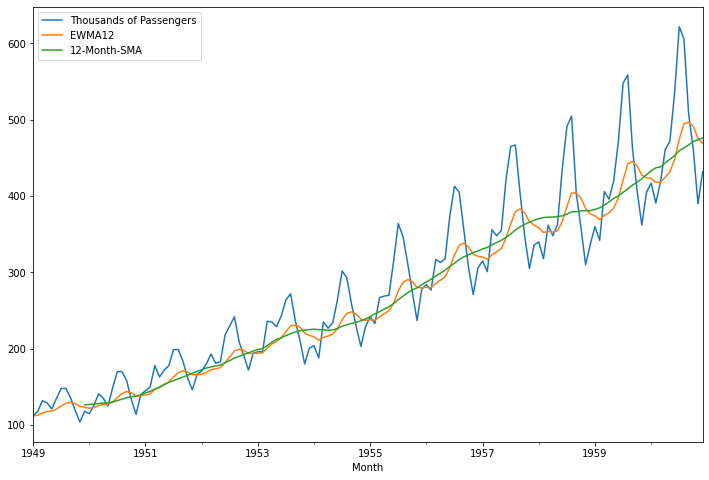

In [58]:
airline[['Thousands of Passengers','EWMA12','12-Month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);